In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/highSpecies/expConditions"

In [3]:
#set training parameters
training_path = simulation_path+'/data/trainingData.txt'
epochs = 20
learning_rate = 0.00001
batch_size = 2**11
lambda_l1 = 0.00001
hidden_size_factor = 2
bottleneck = 1/2

In [4]:
#load saved model, training history, and prediction history
input_size = len(open(training_path).readline().split(' ')) - 1
model = MIMENet.MIMENet(input_size, hidden_size_factor, bottleneck, 1)
model.load_state_dict(torch.load('./modelExpCond.pth'))
#puto model to gpu
model.to('cuda:0')
#put model in eval mode
model.eval()
#load history
with open('./history_exp.json', 'r') as f:
    history = json.load(f)

In [5]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 2.84962 , 1.      , 0.683323, 1.      , 1.      ,
       0.742565, 1.24033 , 1.      , 1.      ])

In [6]:
def forwardPropagate(model, predictionExample):
    with torch.no_grad():
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model.to(device)
        model.eval()
        predictionExample = torch.from_numpy(predictionExample).float().to(device)
        prediction = model(predictionExample)
        prediction = prediction.cpu().numpy()
        return prediction

In [10]:
#check prediction for all zero input
prediction = forwardPropagate(model, np.zeros((1, input_size)))
print(prediction)

[[0.4996355]]


In [11]:
#check prediction for all one input
prediction = forwardPropagate(model, np.ones((1, input_size)))
print(prediction)

[[0.00018821]]


In [12]:
#construct all wildtype input
wildtype = np.zeros((1, input_size))
for i in range(0, len(wildtype[0]), 4):
    if i > 4:
        wildtype[0][i] = 1
print(wildtype)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 

In [13]:
#predict wildtype
prediction = forwardPropagate(model, wildtype)
print(prediction)

[[0.72569525]]


In [14]:
#construct all wildtype input
wildtype = np.zeros((1, input_size))
for i in range(0, len(wildtype[0]), 4):
    if i > 4:
        wildtype[0][i] = 1
for i in range(8):
    wildtype[0][i] = 1
print(wildtype)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 

In [15]:
#predict wildtype
prediction = forwardPropagate(model, wildtype)
print(prediction)

[[0.73099816]]


In [17]:
singleProteinRepresentations = []
predictionExamples = np.zeros((1, input_size))
for i in range(8):
    #copy prediction example
    currentPredictionExample = predictionExamples.copy()
    #set current protein to 1
    currentPredictionExample[0][i] = 1
    singleProteinRepresentations.append(float(forwardPropagate(model, currentPredictionExample)))

print(singleProteinRepresentations)

[0.49085816740989685, 0.482932448387146, 0.49269238114356995, 0.5629986524581909, 0.49405771493911743, 0.4990588426589966, 0.5066277980804443, 0.5613980889320374]


In [25]:
#get all possible combinations of 2 proteins
doubleProteinRepresentations = []
for i in range(4): #first round protein concentration
    for j in range(4, 8): #second round protein concentration
        #copy prediction example
        currentPredictionExample = predictionExamples.copy()
        #set current protein to 1
        currentPredictionExample[0][i] = 1
        currentPredictionExample[0][j] = 1
        #print(currentPredictionExample)
        doubleProteinRepresentations.append(float(forwardPropagate(model, currentPredictionExample)))

print(doubleProteinRepresentations)

[0.5075136423110962, 0.5074666142463684, 0.5022595524787903, 0.5049019455909729, 0.5051703453063965, 0.49977919459342957, 0.49759429693222046, 0.4959415793418884, 0.4989432990550995, 0.4981711208820343, 0.5004583597183228, 0.5712621808052063, 0.4620780944824219, 0.5024396777153015, 0.6042475700378418, 0.6879149675369263]


In [23]:
#do same for wildtype
wildtype = np.zeros((1, input_size))
for i in range(0, len(wildtype[0]), 4):
    if i > 4:
        wildtype[0][i] = 1

singleProteinRepresentationsWildtype = []
for i in range(8):#single protein input
    #copy prediction example
    currentPredictionExample = wildtype.copy()
    #set current protein to 1
    currentPredictionExample[0][i] = 1
    singleProteinRepresentationsWildtype.append(float(forwardPropagate(model, currentPredictionExample)))

print(singleProteinRepresentationsWildtype)

[0.6709503531455994, 0.7052274942398071, 0.7390297651290894, 0.7892058491706848, 0.6538723111152649, 0.6951346397399902, 0.7435174584388733, 0.7979123592376709]


In [26]:
#now do same for double proteins
doubleProteinRepresentationsWildtype = []
for i in range(4): #first round protein concentration
    for j in range(4, 8): #second round protein concentration
        #copy prediction example
        currentPredictionExample = wildtype.copy()
        #set current protein to 1
        currentPredictionExample[0][i] = 1
        currentPredictionExample[0][j] = 1
        #print(currentPredictionExample)
        doubleProteinRepresentationsWildtype.append(float(forwardPropagate(model, currentPredictionExample)))

print(doubleProteinRepresentationsWildtype)

[0.6355068683624268, 0.6608864665031433, 0.694048285484314, 0.732947826385498, 0.6574748158454895, 0.6832157373428345, 0.7257428765296936, 0.7616782784461975, 0.667894721031189, 0.7089623212814331, 0.7559080719947815, 0.8088551163673401, 0.6823452711105347, 0.7394819855690002, 0.8157444000244141, 0.8670468330383301]


In [30]:
#do full prediction for all possible combinations of 2 proteins
predictionExample = np.zeros((1, input_size))
#dict for the protein combinations
proteinCombinations = {}
for i in range(4): #first round protein concentration
    for j in range(4, 8): #second round protein concentration
        #copy prediction example
        currentPredictionExample = predictionExample.copy()
        #set current protein to 1
        currentPredictionExample[0][i] = 1
        currentPredictionExample[0][j] = 1
        #list for all nucleotides
        nucleotidePredictions = []
        #loop over all nucleotides
        for k in range(8, input_size):
            #copy prediction example
            iterPredictionExample = currentPredictionExample.copy()
            #set current nucleotide to 1
            iterPredictionExample[0][k] = 1
            #predict
            nucleotidePredictions.append(float(forwardPropagate(model, iterPredictionExample)))
        #add to dict
        proteinCombinations[str(i)+str(j-4)] = nucleotidePredictions

print(proteinCombinations.keys())

dict_keys(['00', '01', '02', '03', '10', '11', '12', '13', '20', '21', '22', '23', '30', '31', '32', '33'])


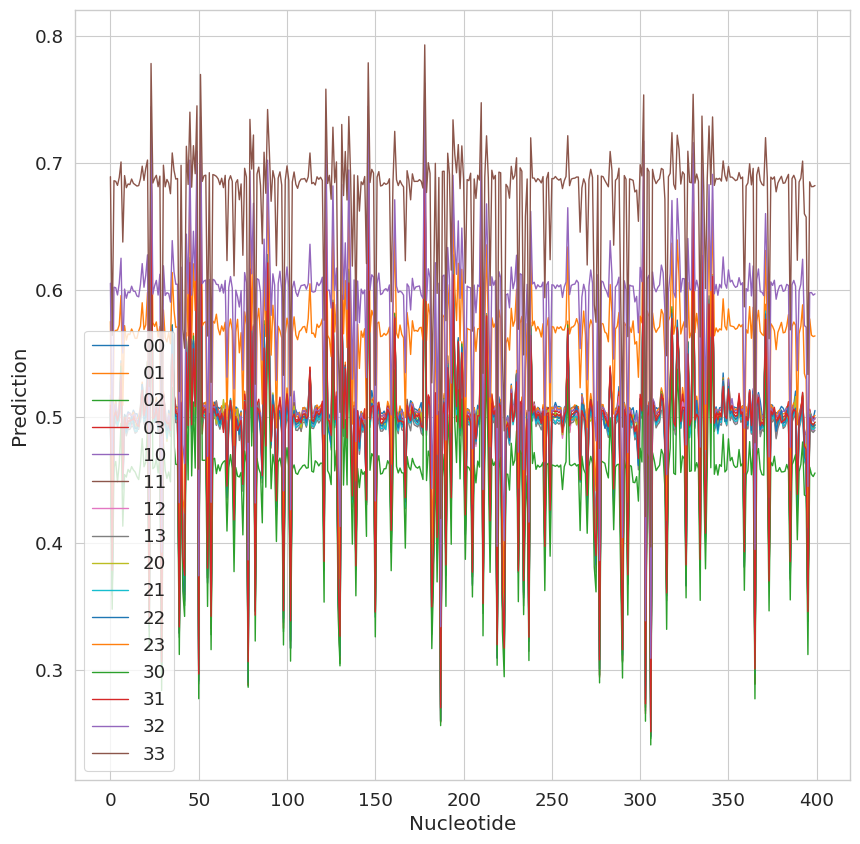

In [37]:
#sns line plot of predictions for all possible combinations of 2 proteins
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10, 10))
for key in proteinCombinations.keys():
    plt.plot(proteinCombinations[key], label=key, linewidth=1)
plt.legend()
plt.xlabel('Nucleotide')
plt.ylabel('Prediction')
plt.show()
